# ORIE 4741 Midterm Report

## Packages:

In [1]:
import Pkg
Pkg.add("CSV")
Pkg.add("Plots")
Pkg.add("DataFrames")
Pkg.add("Statistics")
Pkg.add("Pandas")

   Updating registry at `~/.julia/registries/General`
######################################################################### 100.0%
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [2]:
using Random
Random.seed!(13)

using CSV
using Plots
using DataFrames
using Statistics
using Pandas
using Dates
using PyPlot

In [3]:
import Pkg; Pkg.add("StatPlots")
Pkg; Pkg.add("RDatasets")
using StatPlots, RDatasets 
pyplot()

  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`



This package has been renamed to StatsPlots.
The name StatPlots has been deprecated.

Please run

`]rm StatPlots`
`]add StatsPlots`

Failure to update will mean that you do not receive new developments.



Plots.PyPlotBackend()

In [5]:
Pkg.add("GLM")
using GLM

  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


## Load Data:

In [2019]:
df = CSV.read("shootings.csv")

thread = 1 warning: only found 15 / 16 columns around data row: 4401. Filling remaining columns with `missing`


,Date,NumberOfSubjects,Fatal,SubjectArmed,SubjectRace,SubjectGender
,String,Int64,String,String,String,String
1,3/4/2010,1,N,N,L,U
2,1/9/2010,1,F,Y,W,M
3,6/10/2010,1,F,Y,W,M
4,11/10/2010,1,N,Y,U,M
5,11/11/2010,1,N,Y,L,M
6,11/11/2010,1,N,N,L,F
7,6/4/2011,1,F,Y,L,M
8,9/7/2011,1,N,Y,U,M
9,2/9/2011,1,F,Y,W,M


## Data Summary

In [2017]:
allowmissing!(df)
feature_names = names(df)
for i in 1:16
    println(string(i), "\t", string(feature_names[i]), "\t\t\t", string(eltype(df[!, i])))
end

1	Date			Union{Missing, String}
2	NumberOfSubjects			Union{Missing, Int64}
3	Fatal			Union{Missing, String}
4	SubjectArmed			Union{Missing, String}
5	SubjectRace			Union{Missing, String}
6	SubjectGender			Union{Missing, String}
7	SubjectAge			Union{Missing, String}
8	NatureOfStop			Union{Missing, String}
9	NumberOfShots			Union{Missing, String}
10	NumberOfOfficers			Union{Missing, String}
11	OfficerRace			Union{Missing, String}
12	OfficerGender			Union{Missing, String}
13	Department			Union{Missing, String}
14	FullNarrative			Union{Missing, String}
15	City			Union{Missing, String}
16	Notes			Union{Missing, String}


### Formatting Dataset

#### Changing Date Format:

In [2020]:
df[:Month] = df[:Date]
df[:Year] = df[:Date]
df[:Date1] = df[:Date]

4400-element Array{String,1}:
 "3/4/2010"
 "1/9/2010"
 "6/10/2010"
 "11/10/2010"
 "11/11/2010"
 "11/11/2010"
 "6/4/2011"
 "9/7/2011"
 "2/9/2011"
 "5/10/2011"
 "4/12/2011"
 "1/4/2012"
 "8/6/2012"
 ⋮
 "4/24/2013"
 "5/18/2013"
 "5/21/2014"
 "5/28/2011"
 "6/15/2011"
 "6/19/2015"
 "6/27/2011"
 "6/28/2012"
 "7/26/2015"
 "7/28/2016"
 "8/30/2015"
 "9/15/2012"

In [2021]:
#Formatting Month 
allowmissing!(df)
for i in 1:length(df[:Month])
    s = df.Month[i]   
    if length(s) != 4        
        d = split(s, "/")        
    if length(d) == 3                      
            df.Month[i] = d[1]       
    end        
    if length(d) == 2           
        df.Month[i] = d[2]        
    end    
      
    end
end


for i in 1:length(df[:Month])
    s = df.Month[i]
    if length(s) > 2
        df.Month[i] = missing
    end
end

println(df.Month)

Union{Missing, String}["3", "1", "6", "11", "11", "11", "6", "9", "2", "5", "4", "1", "8", "12", "9", "3", "7", "12", "11", "5", "1", "1", "6", "1", "2", "1", "1", "1", "1", "1", "10", "10", "10", "10", "10", "11", "12", "12", "12", "3", "3", "3", "3", "3", "3", "4", "4", "4", "5", "5", "5", "5", "5", "6", "6", "6", "6", "7", "7", "7", "7", "7", "8", "8", "8", "9", "9", missing, "9", "4", "8", "9", "11", "4", "9", "9", "5", "7", "9", "7", "7", "5", "5", "4", "10", "8", "8", "1", "10", "10", "10", "11", "12", "2", "4", "4", "4", "5", "5", "5", "6", "6", "6", "6", "6", "6", "7", "8", "8", "9", "10", "11", "11", "12", "5", "2", "4", "3", "5", "11", "9", "7", "7", "2", "7", "4", "9", "9", "4", "4", "2", "1", "1", "1", "10", "10", "10", "11", "12", "12", "3", "3", "4", "4", "4", "5", "5", "5", "5", "5", "7", "8", "8", "9", "9", "9", "2", "2", "6", "7", "9", "9", "12", "12", "7", "8", "8", "5", "6", "7", "8", "8", "8", "8", "8", "10", "12", "1", "3", "6", "7", "6", "9", "11", "12", "2", "5",

, "10", "12", "10", "12", "8", "4", "8", "11", "1", "1", "5", "3", "7", "1", "8", "11", "2", "1", "10", "4", "8", "1", "12", "3", "4", "12", "8", "4", "4", "1", "3", "8", "12", "1", "1", "1", "10", "10", "10", "10", "10", "10", "11", "11", "11", "11", "12", "12", "2", "2", "3", "3", "3", "3", "4", "4", "4", "4", "4", "5", "5", "6", "6", "6", "6", "7", "7", "7", "7", "8", "8", "8", "8", "9", "9", "9", "11", "11", "01", "06", "01", "04", "05", "12", "02", "03", "07", "07", "01", "05", "04", "07", "04", "12", "03", "05", "09", "02", "01", "09", "03", "01", "01", "01", "02", "02", "03", "03", "03", "03", "03", "03", "03", "03", "03", "03", "03", "04", "04", "04", "04", "05", "05", "05", "05", "05", "05", "05", "06", "06", "08", "08", "10", "10", "10", "10", "11", "11", "12", "12", "12", "12", "2", "11", "6", "10", "11", "1", "8", "6", "7", "8", "10", "1", "7", "12", "6", "8", "12", "9", "1", "10", "10", "12", "2", "6", "6", "1", "7", "9", "6", "1", "2", "6", "10", "5", "9", "1", "1", "1", 

"08", "08", "08", "08", "08", "08", "09", "10", "11", "12", "12", "12", "12", "12", "12", "12", "5", "2", "7", "3", "3", "1", "2", "11", "2", "2", "4", "3", "5", "4", "4", "5", "6", "4", "3", "3", "11", "10", "11", "5", "4", "4", "10", "1", "10", "10", "10", "11", "11", "11", "11", "12", "12", "12", "2", "2", "2", "2", "2", "3", "3", "3", "3", "4", "4", "4", "4", "4", "5", "6", "6", "6", "6", "6", "6", "6", "6", "7", "7", "7", "7", "7", "7", "7", "7", "7", "8", "8", "8", "8", "9", "9", "9", "05", "10", "09", "03", "05", "07", "09", "09", "10", "10", "11", "02", "01", "11", "7", "12", "4", "11", "10", "1", "6", "8", "5", "3", "4", "2", "12", "11", "11", "11", "11", "10", "3", "1", "12", "1", "1", "11", "4", "1", "10", "10", "10", "10", "12", "12", "12", "12", "2", "2", "3", "3", "3", "4", "4", "5", "5", "6", "6", "7", "7", "7", "7", "7", "7", "8", "8", "9", "9", "9", "9", "9", "10", "10", "4", "5", "3", "1", "2", "5", "12", "8", "11", "8", "2", "11", "7", "3", "5", "3", "1", "10", "10",

In [2022]:
#Formatting Year
allowmissing!(df)
for i in 1:length(df[:Year])
    s = df.Year[i]   
    if length(s) != 4        
        d = split(s, "/")        
    if length(d) == 3                     
            df.Year[i] = d[3]       
    end        
    if length(d) == 2           
        df.Year[i] = d[1]        
    end    
    else              
        df.Year[i] = d[1]    
    end
end


for i in 1:length(df[:Year])
    s = df.Year[i]
    if length(s) != 4
        df.Year[i] = missing
    end
end

println(df.Year)

Union{Missing, String}["2010", "2010", "2010", "2010", "2010", "2010", "2011", "2011", "2011", "2011", "2011", "2012", "2012", "2013", "2013", "2013", "2013", "2013", "2013", "2014", "2014", "2015", "2015", "2015", "2016", "2016", "2010", "2015", "2011", "2010", "2010", "2016", "2013", "2013", "2010", "2013", "2014", "2012", "2015", "2014", "2012", "2013", "2012", "2014", "2010", "2010", "2012", "2014", "2014", "2016", "2015", "2015", "2016", "2010", "2016", "2012", "2011", "2014", "2010", "2010", "2013", "2015", "2010", "2013", "2011", "2010", "2015", missing, "2011", "2011", "2011", "2012", "2012", "2013", "2013", "2013", "2014", "2014", "2014", "2014", "2015", "2015", "2015", "2015", "2015", "2015", "2015", "2014", "2013", "2014", "2011", "2011", "2012", "2010", "2010", "2012", "2015", "2013", "2012", "2014", "2014", "2013", "2014", "2010", "2012", "2011", "2012", "2015", "2014", "2013", "2010", "2010", "2011", "2011", "2011", "2012", "2012", "2013", "2013", "2013", "2014", "2015", 

14", "2014", "2014", "2014", "2014", "2014", "2014", "2015", "2015", "2015", "2015", "2016", "2016", "2016", "2016", "2016", "2013", "2016", "2016", "2014", "2016", "2012", "2012", "2010", "2015", "2015", "2010", "2011", "2012", "2010", "2011", "2012", "2014", "2010", "2010", "2011", "2011", "2012", "2014", "2014", "2013", "2012", "2010", "2013", "2012", "2013", "2010", "2011", "2016", "2013", "2016", "2014", "2010", "2012", "2014", "2012", "2012", "2012", "2012", "2012", "2012", "2013", "2015", "2014", "2014", "2015", "2010", "2013", "2011", "2012", "2013", "2014", "2015", "2010", "2012", "2010", "2013", "2011", "2016", "2012", "2013", "2014", "2014", "2014", "2016", "2014", "2015", "2013", "2016", "2015", "2013", "2015", "2010", "2010", "2010", "2010", "2010", "2010", "2010", "2010", "2010", "2011", "2011", "2011", "2012", "2012", "2012", "2012", "2012", "2012", "2012", "2013", "2013", "2014", "2014", "2014", "2014", "2014", "2014", "2014", "2014", "2015", "2015", "2015", "2015", "20

14", "2011", "2016", "2013", "2011", "2015", "2015", "2011", "2011", "2015", "2010", "2013", "2015", "2011", "2015", "2016", "2014", "2011", "2013", "2010", "2011", "2012", "2011", "2015", "2010", "2016", "2011", "2011", "2011", "2011", "2011", missing, "2012", "2012", "2013", "2013", "2013", "2013", "2013", "2013", "2013", "2013", "2014", "2014", "2014", "2014", "2014", "2014", "2014", "2014", "2015", "2015", "2015", "2015", "2015", "2016", "2016", "2016", "2016", "2016", "2016", "2016", "2016", "2014", "2011", "2010", "2015", "2016", "2014", "2014", "2016", "2011", "2012", "2013", "2014", "2015", "2013", "2011", "2014", "2014", "2014", "2013", "2011", "2012", "2015", "2013", "2015", "2014", "2014", "2015", "2013", "2015", "2015", "2013", "2012", "2016", "2010", "2010", "2011", "2015", "2016", "2015", "2015", "2013", "2012", "2012", "2015", "2016", "2014", "2015", missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missi

"2012", "2016", "2012", "2014", "2013", "2010", "2010", "2011", "2010", "2011", "2016", "2012", "2014", "2010", "2010", "2010", "2010", "2010", "2010", "2010", "2010", "2011", "2011", "2011", "2011", "2011", "2011", "2011", "2011", "2011", "2011", "2011", "2011", "2011", "2011", "2011", "2012", "2012", "2012", "2012", "2012", "2012", "2012", "2013", "2013", "2013", "2013", "2013", "2013", "2013", "2013", "2013", "2013", "2013", "2013", "2013", "2013", "2013", "2013", "2013", "2014", "2014", "2014", "2014", "2014", "2014", "2014", "2015", "2015", "2015", "2015", "2015", "2016", "2016", "2016", "2016", "2016", "2016", "2016", "2016", "2013", "2012", "2016", "2011", "2015", "2010", "2015", "2011", "2010", "2014", "2011", "2012", "2012", "2012", "2015", "2015", "2010", "2014", "2014", "2015", "2011", "2015", "2011", "2013", "2016", "2016", "2011", "2014", "2016", "2016", "2016", "2014", "2014", "2012", "2013", "2014", "2014", "2014", "2015", "2013", "2013", "2013", "2016", "2013", "2010", 

In [2023]:
#Formatting Date1 as Float64: Year.Month
for i in 1:length(df[:Month])
    df.Date1[i] = string(df.Year[i], "." , df.Month[i])
end
df[:Date1]

4400-element Array{Union{Missing, String},1}:
 "2010.3"
 "2010.1"
 "2010.6"
 "2010.11"
 "2010.11"
 "2010.11"
 "2011.6"
 "2011.9"
 "2011.2"
 "2011.5"
 "2011.4"
 "2012.1"
 "2012.8"
 ⋮
 "2013.4"
 "2013.5"
 "2014.5"
 "2011.5"
 "2011.6"
 "2015.6"
 "2011.6"
 "2012.6"
 "2015.7"
 "2016.7"
 "2015.8"
 "2012.9"

In [2136]:
#Removing all missing data
df_nomissing = dropmissing(df, disallowmissing=true)

,Date,NumberOfSubjects,Fatal,SubjectArmed,SubjectRace,SubjectGender
,String,Int64,String,String,String,String
1,3/4/2010,1,N,N,L,U
2,11/11/2010,1,N,N,L,F
3,12/1/2013,1,F,N,W,M
4,7/5/2013,1,F,N,B,M
5,12/8/2013,1,F,N,W,M
6,1/9/2014,1,N,N,U,U
7,6/4/2015,1,N,N,L,M
8,1/14/2011,1,N,N,U,M
9,10/31/2010,1,F,N,W,M


In [2137]:
# description of the dataset
for i in 1:size(df_nomissing,2)
    println(string(names(df_nomissing)[i], "\t\t", typeof(df_nomissing[4,i]), "\t\t\t", df_nomissing[4,i]))  
end

Date		String			7/5/2013
NumberOfSubjects		Int64			1
Fatal		String			F
SubjectArmed		String			N
SubjectRace		String			B
SubjectGender		String			M
SubjectAge		String			U
NatureOfStop		String			NA
NumberOfShots		String			NA
NumberOfOfficers		String			2
OfficerRace		String			W;W
OfficerGender		String			M;F
Department		String			Albuquerque Police Department
FullNarrative		String			NA
City		String			Albuquerque
Notes		String			knife/cutting instrument
Month		String			7
Year		String			2013
Date1		String			2013.7


#### Encoding Fatal Column:

In [2138]:
for i in 1:1286
    if isequal(df_nomissing.Fatal[i], "N") == true
        df_nomissing.Fatal[i] = "-1" 
        
    elseif isequal(df_nomissing.Fatal[i], " N") == true
        df_nomissing.Fatal[i] = "-1"    
        
    elseif isequal(df_nomissing.Fatal[i], "F") == true
        df_nomissing.Fatal[i] = "1"
        
    elseif isequal(df_nomissing.Fatal[i], " F") == true
        df_nomissing.Fatal[i] = "1"    
        
    elseif isequal(df_nomissing.Fatal[i], "U") == true
        df_nomissing.Fatal[i] = "0" #0 corresponds to unknown
    end
end
df_nomissing.Fatal

1286-element PooledArrays.PooledArray{String,UInt32,1,Array{UInt32,1}}:
 "-1"
 "-1"
 "1"
 "1"
 "1"
 "-1"
 "-1"
 "-1"
 "1"
 "-1"
 "-1"
 "1"
 "1"
 ⋮
 "-1"
 "-1"
 "1"
 "-1"
 "1"
 "-1"
 "1"
 "1"
 "1"
 "-1"
 "1"
 "-1"

In [2139]:
df_nomissing.Fatal = parse.(Int64,df_nomissing.Fatal)

1286-element Array{Int64,1}:
 -1
 -1
  1
  1
  1
 -1
 -1
 -1
  1
 -1
 -1
  1
  1
  ⋮
 -1
 -1
  1
 -1
  1
 -1
  1
  1
  1
 -1
  1
 -1

#### Encoding SubjectArmed Column:

In [2140]:
for i in 1:1286
    if isequal(df_nomissing.SubjectArmed[i], "N") == true
        df_nomissing.SubjectArmed[i] = "0" 
        
    elseif isequal(df_nomissing.SubjectArmed[i], "Y") == true
        df_nomissing.SubjectArmed[i] = "1"
        
    elseif isequal(df_nomissing.SubjectArmed[i], "Y ") == true
        df_nomissing.SubjectArmed[i] = "1"
            
    elseif isequal(df_nomissing.SubjectArmed[i], "U") == true
        df_nomissing.SubjectArmed[i] = "0" #0 corresponds to unknown
        
    elseif isequal(df_nomissing.SubjectArmed[i], "NA") == true
        df_nomissing.SubjectArmed[i] = "0" #0 corresponds to NA
    end
    
end

df_nomissing.SubjectArmed

1286-element PooledArrays.PooledArray{String,UInt32,1,Array{UInt32,1}}:
 "0"
 "0"
 "0"
 "0"
 "0"
 "0"
 "0"
 "0"
 "0"
 "0"
 "0"
 "0"
 "0"
 ⋮
 "0"
 "0"
 "0"
 "0"
 "0"
 "0"
 "0"
 "0"
 "0"
 "0"
 "0"
 "0"

In [2141]:
df_nomissing.SubjectArmed = parse.(Int64,df_nomissing.SubjectArmed)

1286-element Array{Int64,1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

#### Encoding SubjectRace Column:

In [2142]:
for i in 1:1286
    if isequal(df_nomissing.SubjectRace[i], "W") == true
        df_nomissing.SubjectRace[i] = "1" 
        
    elseif isequal(df_nomissing.SubjectRace[i], "B") == true
        df_nomissing.SubjectRace[i] = "2"
            
    elseif isequal(df_nomissing.SubjectRace[i], "A") == true
        df_nomissing.SubjectRace[i] = "3"
    
    elseif isequal(df_nomissing.SubjectRace[i], "L") == true
        df_nomissing.SubjectRace[i] = "4"
    
    else
        df_nomissing.SubjectRace[i] = "0"     #0 corresponds to Other
            
    end
    
end

df_nomissing.SubjectRace

1286-element PooledArrays.PooledArray{String,UInt32,1,Array{UInt32,1}}:
 "4"
 "4"
 "1"
 "2"
 "1"
 "0"
 "4"
 "0"
 "1"
 "0"
 "4"
 "1"
 "1"
 ⋮
 "1"
 "4"
 "1"
 "4"
 "4"
 "4"
 "4"
 "1"
 "4"
 "1"
 "4"
 "1"

In [2143]:
df_nomissing.SubjectRace = parse.(Int64,df_nomissing.SubjectRace)

1286-element Array{Int64,1}:
 4
 4
 1
 2
 1
 0
 4
 0
 1
 0
 4
 1
 1
 ⋮
 1
 4
 1
 4
 4
 4
 4
 1
 4
 1
 4
 1

#### Encoding SubjectGender Column:

In [2144]:
for i in 1:1286
    if isequal(df_nomissing.SubjectGender[i], "U") == true
        df_nomissing.SubjectGender[i] = "0" 
        
    elseif isequal(df_nomissing.SubjectGender[i], "M") == true
        df_nomissing.SubjectGender[i] = "1"
        
    elseif isequal(df_nomissing.SubjectGender[i], "F") == true
        df_nomissing.SubjectGender[i] = "2"
            
    elseif isequal(df_nomissing.SubjectGender[i], "NA") == true
        df_nomissing.SubjectGender[i] = "0" 
        
    elseif isequal(df_nomissing.SubjectGender[i], "N/A") == true
        df_nomissing.SubjectGender[i] = "0" #9 corresponds to U or NA or N/A
    end
    
end

df_nomissing.SubjectGender

1286-element PooledArrays.PooledArray{String,UInt32,1,Array{UInt32,1}}:
 "0"
 "2"
 "1"
 "1"
 "1"
 "0"
 "1"
 "1"
 "1"
 "1"
 "0"
 "1"
 "1"
 ⋮
 "0"
 "0"
 "1"
 "1"
 "2"
 "1"
 "1"
 "1"
 "1"
 "1"
 "1"
 "1"

In [2145]:
df_nomissing.SubjectGender = parse.(Int64,df_nomissing.SubjectGender)

1286-element Array{Int64,1}:
 0
 2
 1
 1
 1
 0
 1
 1
 1
 1
 0
 1
 1
 ⋮
 0
 0
 1
 1
 2
 1
 1
 1
 1
 1
 1
 1

#### Encoding SubjectAge Column:

In [2146]:
for i in 1:1286
    if isequal(df_nomissing.SubjectAge[i], "0-19") == true
        df_nomissing.SubjectAge[i] = "10"
    end
    if isequal(df_nomissing.SubjectAge[i], "40-49") == true
        df_nomissing.SubjectAge[i] = "45"
    end
    if isequal(df_nomissing.SubjectAge[i], "30-39") == true
        df_nomissing.SubjectAge[i] = "35"
    end
    if isequal(df_nomissing.SubjectAge[i], "12") == true
        df_nomissing.SubjectAge[i] = "12"
    end
    if isequal(df_nomissing.SubjectAge[i], "juvenile") == true
        df_nomissing.SubjectAge[i] = "15"
    end
    if isequal(df_nomissing.SubjectAge[i], "20-29") == true
        df_nomissing.SubjectAge[i] = "25"
    end
    if isequal(df_nomissing.SubjectAge[i], "21-23") == true
        df_nomissing.SubjectAge[i] = "22"
    end
    if isequal(df_nomissing.SubjectAge[i], "4") == true
        df_nomissing.SubjectAge[i] = "4"
    end
    if isequal(df_nomissing.SubjectAge[i], "U") == true
        df_nomissing.SubjectAge[i] = "0"
    end
    if isequal(df_nomissing.SubjectAge[i], "N/A") == true
        df_nomissing.SubjectAge[i] = "0"
    end
end

df_nomissing.SubjectAge

1286-element PooledArrays.PooledArray{String,UInt32,1,Array{UInt32,1}}:
 "0"
 "0"
 "0"
 "0"
 "0"
 "0"
 "0"
 "0"
 "0"
 "0"
 "0"
 "0"
 "0"
 ⋮
 "0"
 "0"
 "30"
 "28"
 "28"
 "41"
 "22"
 "28"
 "43"
 "30"
 "30"
 "23"

In [2147]:
df_nomissing.SubjectAge = parse.(Int64,df_nomissing.SubjectAge)

1286-element Array{Int64,1}:
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  ⋮
  0
  0
 30
 28
 28
 41
 22
 28
 43
 30
 30
 23

#### Encoding NumberOfShots Column:

In [2151]:
for i in 1:1286
    if isequal(df_nomissing.NumberOfShots[i], "Multiple") == true
        df_nomissing.NumberOfShots[i] = "5"
    end
    if isequal(df_nomissing.NumberOfShots[i], "73 total") == true
        df_nomissing.NumberOfShots[i] = "73"
    end
    if isequal(df_nomissing.NumberOfShots[i], "1;3") == true
        df_nomissing.NumberOfShots[i] = "4"
    end
    if isequal(df_nomissing.NumberOfShots[i], ">4") == true
        df_nomissing.NumberOfShots[i] = "7"
    end
    if isequal(df_nomissing.NumberOfShots[i], "5") == true
        df_nomissing.NumberOfShots[i] = "5"
    end
    if isequal(df_nomissing.NumberOfShots[i], " 8") == true
        df_nomissing.NumberOfShots[i] = "8"
    end
    if isequal(df_nomissing.NumberOfShots[i], ">/=20") == true
        df_nomissing.NumberOfShots[i] = "22"
    end
    if isequal(df_nomissing.NumberOfShots[i], "5;5;3") == true
        df_nomissing.NumberOfShots[i] = "13"
    end
    if isequal(df_nomissing.NumberOfShots[i], "no information") == true
        df_nomissing.NumberOfShots[i] = "0"
    end
    if isequal(df_nomissing.NumberOfShots[i], "5;8;6") == true
        df_nomissing.NumberOfShots[i] = "19"
    end
    if isequal(df_nomissing.NumberOfShots[i], "0;2;0") == true
        df_nomissing.NumberOfShots[i] = "2"
    end
    if isequal(df_nomissing.NumberOfShots[i], ">/=5") == true
        df_nomissing.NumberOfShots[i] = "8"
    end
    if isequal(df_nomissing.NumberOfShots[i], "5;1") == true
        df_nomissing.NumberOfShots[i] = "6"
    end
    if isequal(df_nomissing.NumberOfShots[i], "13;4") == true
        df_nomissing.NumberOfShots[i] = "17"
    end
    if isequal(df_nomissing.NumberOfShots[i], "9;7;4;7;2;7;3") == true
        df_nomissing.NumberOfShots[i] = "39"
    end
    if isequal(df_nomissing.NumberOfShots[i], "16;16;2;12") == true
        df_nomissing.NumberOfShots[i] = "46"
    end
    if isequal(df_nomissing.NumberOfShots[i], ">1") == true
        df_nomissing.NumberOfShots[i] = "4"
    end
    if isequal(df_nomissing.NumberOfShots[i], "Unknown") == true
        df_nomissing.NumberOfShots[i] = "0"
    end
    if isequal(df_nomissing.NumberOfShots[i], ">13") == true
        df_nomissing.NumberOfShots[i] = "16"
    end
    if isequal(df_nomissing.NumberOfShots[i], "3;8;8") == true
        df_nomissing.NumberOfShots[i] = "19"
    end
    if isequal(df_nomissing.NumberOfShots[i], ">/=12") == true
        df_nomissing.NumberOfShots[i] = "13"
    end
    if isequal(df_nomissing.NumberOfShots[i], ">1") == true
        df_nomissing.NumberOfShots[i] = "4"
    end
    if isequal(df_nomissing.NumberOfShots[i], "10;3;2;2") == true
        df_nomissing.NumberOfShots[i] = "17"
    end
    if isequal(df_nomissing.NumberOfShots[i], "not clear") == true
        df_nomissing.NumberOfShots[i] = "0"
    end
    if isequal(df_nomissing.NumberOfShots[i], "10;3;2;2") == true
        df_nomissing.NumberOfShots[i] = "17"
    end
    if isequal(df_nomissing.NumberOfShots[i], ">/=12") == true
        df_nomissing.NumberOfShots[i] = "13"
    end
    if isequal(df_nomissing.NumberOfShots[i], "9;5;4") == true
        df_nomissing.NumberOfShots[i] = "18"
    end
    if isequal(df_nomissing.NumberOfShots[i], "5;8;6") == true
        df_nomissing.NumberOfShots[i] = "19"
    end
    if isequal(df_nomissing.NumberOfShots[i], "16;9;12") == true
        df_nomissing.NumberOfShots[i] = "37"
    end
    if isequal(df_nomissing.NumberOfShots[i], ">3") == true
        df_nomissing.NumberOfShots[i] = "6"
    end
    if isequal(df_nomissing.NumberOfShots[i], ">4") == true
        df_nomissing.NumberOfShots[i] = "7"
    end
    if isequal(df_nomissing.NumberOfShots[i], ">2") == true
        df_nomissing.NumberOfShots[i] = "5"
    end
    if isequal(df_nomissing.NumberOfShots[i], "U") == true
        df_nomissing.NumberOfShots[i] = "0"
    end
    if isequal(df_nomissing.NumberOfShots[i], "1*") == true
        df_nomissing.NumberOfShots[i] = "2"
    end
    if isequal(df_nomissing.NumberOfShots[i], "3-5") == true
        df_nomissing.NumberOfShots[i] = "4"
    end
    if isequal(df_nomissing.NumberOfShots[i], "NA") == true
        df_nomissing.NumberOfShots[i] = "0"
    end
    if length(df_nomissing.NumberOfShots[i]) > 2
        df_nomissing.NumberOfShots[i] = "0"
    end
end

df_nomissing.NumberOfShots

1286-element Array{String,1}:
 "0"
 "0"
 "0"
 "0"
 "0"
 "0"
 "0"
 "0"
 "0"
 "0"
 "0"
 "0"
 "0"
 ⋮
 "0"
 "0"
 "0"
 "0"
 "0"
 "0"
 "0"
 "0"
 "0"
 "0"
 "0"
 "0"

In [2157]:
df_nomissing.NumberOfShots = parse.(Int64,df_nomissing.NumberOfShots)

1286-element Array{Int64,1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

#### Changing Date Format:

In [2158]:
df_nomissing.Year = parse.(Int64,df_nomissing.Year)

1286-element Array{Int64,1}:
 2010
 2010
 2013
 2013
 2013
 2014
 2015
 2011
 2010
 2014
 2012
 2014
 2012
    ⋮
 2013
 2013
 2016
 2016
 2015
 2016
 2013
 2014
 2011
 2015
 2011
 2015

In [2159]:
df_nomissing.Month = parse.(Int64,df_nomissing.Month)

1286-element Array{Int64,1}:
  3
 11
 12
  7
 12
  1
  6
  1
 10
 12
 12
  3
  3
  ⋮
  2
  2
  8
  2
  2
  3
  5
  5
  6
  6
  6
  7

In [2160]:
df_nomissing.Date1 = parse.(Float64,df_nomissing.Date1)

1286-element Array{Float64,1}:
 2010.3
 2010.11
 2013.12
 2013.7
 2013.12
 2014.1
 2015.6
 2011.1
 2010.1
 2014.12
 2012.12
 2014.3
 2012.3
    ⋮
 2013.2
 2013.2
 2016.8
 2016.2
 2015.2
 2016.3
 2013.5
 2014.5
 2011.6
 2015.6
 2011.6
 2015.7

In [2163]:
# description of the dataset
for i in 1:size(df_nomissing,2)
    println(string(names(df_nomissing)[i], "\t\t", typeof(df_nomissing[4,i]), "\t\t\t", df_nomissing[4,i]))  
end

Fatal		Int64			1
SubjectArmed		Int64			0
SubjectRace		Int64			2
SubjectGender		Int64			1
SubjectAge		Int64			0
NumberOfShots		Int64			0
Year		Int64			2013


In [2162]:
#Removing All Columns not used in Analysis
deletecols!(df_nomissing,1)
deletecols!(df_nomissing,1)
deletecols!(df_nomissing,6)
deletecols!(df_nomissing,7)
deletecols!(df_nomissing,7)
deletecols!(df_nomissing,7)
deletecols!(df_nomissing,7)
deletecols!(df_nomissing,7)
deletecols!(df_nomissing,7)
deletecols!(df_nomissing,7)
deletecols!(df_nomissing,7)
deletecols!(df_nomissing,8)

,Fatal,SubjectArmed,SubjectRace,SubjectGender,SubjectAge,NumberOfShots,Year
,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,-1,0,4,0,0,0,2010
2,-1,0,4,2,0,0,2010
3,1,0,1,1,0,0,2013
4,1,0,2,1,0,0,2013
5,1,0,1,1,0,0,2013
6,-1,0,0,0,0,0,2014
7,-1,0,4,1,0,0,2015
8,-1,0,0,1,0,0,2011
9,1,0,1,1,0,0,2010


In [2164]:
# description of the dataset
for i in 1:size(df_nomissing,2)
    println(string(names(df_nomissing)[i], "\t\t", typeof(df_nomissing[4,i]), "\t\t\t", df_nomissing[4,i]))  
end

Fatal		Int64			1
SubjectArmed		Int64			0
SubjectRace		Int64			2
SubjectGender		Int64			1
SubjectAge		Int64			0
NumberOfShots		Int64			0
Year		Int64			2013


## Dataset Formated, Dividing data into test and training set

In [2165]:
df1=convert(Array{Float64,2},df_nomissing)

1286×7 Array{Float64,2}:
 -1.0  0.0  4.0  0.0   0.0  0.0  2010.0
 -1.0  0.0  4.0  2.0   0.0  0.0  2010.0
  1.0  0.0  1.0  1.0   0.0  0.0  2013.0
  1.0  0.0  2.0  1.0   0.0  0.0  2013.0
  1.0  0.0  1.0  1.0   0.0  0.0  2013.0
 -1.0  0.0  0.0  0.0   0.0  0.0  2014.0
 -1.0  0.0  4.0  1.0   0.0  0.0  2015.0
 -1.0  0.0  0.0  1.0   0.0  0.0  2011.0
  1.0  0.0  1.0  1.0   0.0  0.0  2010.0
 -1.0  0.0  0.0  1.0   0.0  0.0  2014.0
 -1.0  0.0  4.0  0.0   0.0  0.0  2012.0
  1.0  0.0  1.0  1.0   0.0  0.0  2014.0
  1.0  0.0  1.0  1.0   0.0  0.0  2012.0
  ⋮                         ⋮    
 -1.0  0.0  1.0  0.0   0.0  0.0  2013.0
 -1.0  0.0  4.0  0.0   0.0  0.0  2013.0
  1.0  0.0  1.0  1.0  30.0  0.0  2016.0
 -1.0  0.0  4.0  1.0  28.0  0.0  2016.0
  1.0  0.0  4.0  2.0  28.0  0.0  2015.0
 -1.0  0.0  4.0  1.0  41.0  0.0  2016.0
  1.0  0.0  4.0  1.0  22.0  0.0  2013.0
  1.0  0.0  1.0  1.0  28.0  0.0  2014.0
  1.0  0.0  4.0  1.0  43.0  0.0  2011.0
 -1.0  0.0  1.0  1.0  30.0  0.0  2015.0
  1.0  0.0  4.0  1.0 

In [2167]:
X = df1[:,2:end]
y = df1[:,1]
n = size(df1)[1]
is = sortperm(rand(n))
Xtrain = X[is[1:Int(4*round(n/5))],:]
Xtest = X[is[Int(4*round(n/5)+1):end],:] 
ytrain = convert(Array{Int}, y[is[1:Int(4*round(n/5))]]) 
ytest = convert(Array{Int}, y[is[Int(4*round(n/5)+1):end]]) 


258-element Array{Int64,1}:
 -1
 -1
 -1
  1
 -1
 -1
  1
  1
  1
 -1
  0
  1
  1
  ⋮
  1
 -1
 -1
  1
  1
 -1
 -1
 -1
 -1
 -1
 -1
  1

## Analysis:

In [1490]:
using LowRankModels;

In [1491]:
include("proxgrad.jl");

## 1. Perceptron:

In [2170]:
# try to make a function for this
function pltpercep(xc, yc, X, y)
    clf()
    #hold(true)
    axis("on")
    n = size(X)[1]
    for i=1:n
        PyPlot.plot(X[i,xc], X[i,yc], y[i]==1 ? "rd" : "bo")
    end
    

    # set figure limits
    ylim([-1,maximum(X[:,yc].+1)])
    xlim([-1,maximum(X[:,xc].+1)])
    title("Perceptron Attempt")
    legend(["Non-Fatal","Fatal"], loc= "upper right")
end

pltpercep (generic function with 1 method)

In [2095]:
# description of the dataset
for i in 1:size(df_nomissing,2)
    println(string(names(df_nomissing)[i], "\t\t", typeof(df_nomissing[4,i]), "\t\t\t", df_nomissing[4,i]))  
end

Fatal		Int64			1
SubjectArmed		Int64			0
SubjectRace		Int64			0
SubjectGender		Int64			1
SubjectAge		Int64			0
NumberOfShots		Int64			0
Year		Int64			2013


In [2168]:
#Format Subject Race & Subject Age
SR = []
SA = [] 
new_Xtrain = []
new_ytrain = []

for i in 1:1028
    if isequal(Xtrain[:,2][i], 0) == false | isequal(Xtrain[:,4][i], 0) == false 
            SR = vcat(SR, Xtrain[:,2][i])
            SA = vcat(SA, Xtrain[:,4][i])
            new_ytrain = vcat(new_ytrain, ytrain[i])
    end
end
new_Xtrain = hcat(SR,SA)

451×2 Array{Float64,2}:
 1.0  20.0
 1.0  26.0
 1.0  54.0
 3.0  36.0
 4.0  24.0
 2.0  25.0
 4.0  27.0
 4.0  18.0
 1.0  21.0
 1.0  47.0
 1.0  51.0
 2.0  17.0
 2.0  25.0
 ⋮    
 2.0  17.0
 1.0  21.0
 4.0  35.0
 4.0  26.0
 1.0  21.0
 1.0  40.0
 1.0  28.0
 4.0  47.0
 2.0  34.0
 1.0  23.0
 2.0  23.0
 1.0  30.0

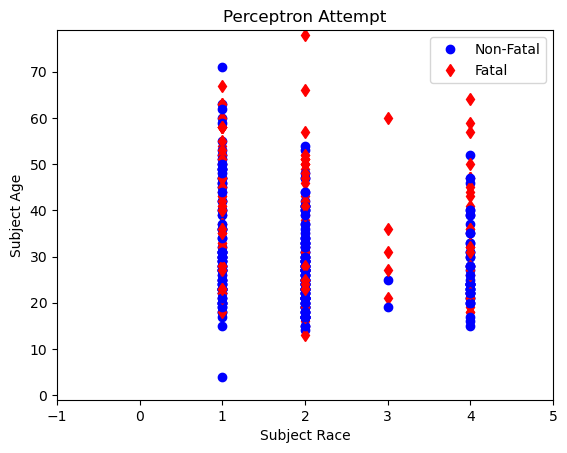

PyObject Text(24.000000000000007, 0.5, 'Subject Age')

In [2171]:
# Subject Race, and Subject Age
pltpercep(1,2,new_Xtrain[1:451,:], new_ytrain[1:451])
xlabel("Subject Race")
ylabel("Subject Age")

In [2174]:
#Format Subject Race & Number of Shots to remove 0's
SR = []
NoS = [] 
new_Xtrain = []
new_ytrain = []

for i in 1:1028
    if isequal(Xtrain[:,2][i], 0) == false | isequal(Xtrain[:,5][i], 0) == false 
            SR = vcat(SR, Xtrain[:,2][i])
            NoS = vcat(NoS, Xtrain[:,5][i])
            new_ytrain = vcat(new_ytrain, ytrain[i])
    end
end
new_Xtrain = hcat(SR,NoS)

257-element Array{Any,1}:
  1
  1
 -1
 -1
 -1
  1
 -1
  0
 -1
  1
 -1
  1
  1
  ⋮
  1
  1
  1
  1
  1
  1
  1
 -1
 -1
 -1
  1
 -1

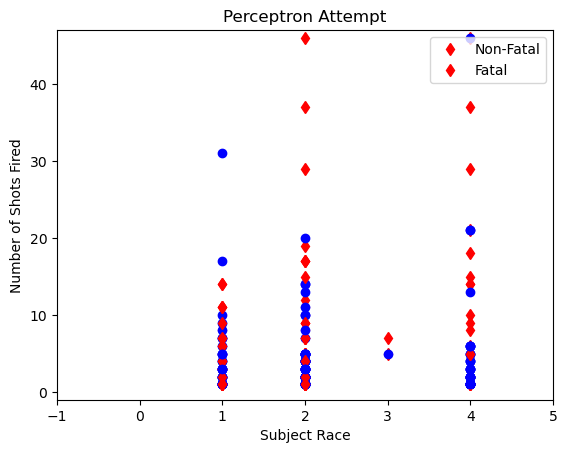

PyObject Text(24.000000000000014, 0.5, 'Number of Shots Fired')

In [2175]:
# Subject Race, and Number of Shots Fired
pltpercep(1,2,new_Xtrain[1:257,:], new_ytrain[1:257])
xlabel("Subject Race")
ylabel("Number of Shots Fired")

## 2. Polynomial:

In [1502]:
function fit_polynomial(xtrain::Array, xtest::Array, ytrain::Array, ytest::Array; max_order = 10)
    
    # create a w matrix 
    w_mat = zeros(Float64, max_order+1, max_order+1)
    
    # Vandermode matrix initalization
    X₁ = zeros(length(xtrain), max_order+1)
    for j = 0:max_order
        X₁[:,j+1] = xtrain.^j
    end

    mis = Array{Float64}(undef, max_order+1)

    # find the model with the lowest error on the test set
    for order = 0:max_order
        # Vandermode matrix subset  
        X = X₁[:,1:order+1]

        # Fit a model
        w= X\ytrain
        # @show w
        
        w_mat[order+1, 1:order+1] = w

        # Size of test set
        n_test = length(xtest)
        
        # Test the model on the test set
        predictions = zeros(n_test)
        for i in 1:n_test
            # compute the predicted make or miss for a shot clock
            prediction = 0
            for k = 0:order
                prediction += w[k+1]*xtest[i]^k
            end
            # prediction
            predictions[i] = sign(prediction) 
        end
        # calculate the  misclassification rate based on predictions[i] and ytrain
        mis[order+1] = 1- (abs(sum(predictions + ytest))/2) / n_test   
    end

    return w_mat, mis
end

fit_polynomial (generic function with 1 method)

In [1503]:
# now create a function that takes in the first four and plots them 
function plotmodel(w, os)
    xmin, xmax = 0, 25
    ymin, ymax = -0.1, 0.5
    n = 100
    xs = range(xmin,stop=xmax,length=n)
    ## os[i] is the order
    
    ## each order, ie order 1, 2, 3
    m = length(os)
    y = zeros(m,n)
    for i in 1:m
        order = os[i]
        for k = 1:n
            for j in 0:order
                y[i,k] += w[order+1,j+1]*xs[k]^j
            end
        end
    end
    xmin, xmax = 0, 25
    ymin, ymax = -0.1,1.25
    PyPlot.plot(xs,(y[3,:].+1)/2, color = "cyan", label = "3rd Best: Order $(os[3]) Model")
    PyPlot.plot(xs,(y[2,:].+1)/2, color = "red", label = "2nd Best: Order $(os[2]) Model")
    PyPlot.plot(xs,(y[1,:].+1)/2, color = "blue", label = "Best: Order $(os[1]) Model")
    legend()
    ylim([ymin, ymax])
    PyPlot.plot([xmin,xmax], [0,0], color = "black")
    PyPlot.plot([0,0], [ymin, ymax], color = "black")
end

plotmodel (generic function with 1 method)

In [2176]:
#Format Subject Race to remove 0's
SRtrain = []
SRtest = []
new_ytrain = []
new_ytest = []

for i in 1:1028
    if isequal(Xtrain[:,2][i], 0) == false 
            SRtrain = vcat(SRtrain, Xtrain[:,2][i])
            new_ytrain = vcat(new_ytrain, ytrain[i])
    end
end
for i in 1:258
    if isequal(Xtest[:,2][i], 0) == false 
            SRtest = vcat(SRtest, Xtest[:,2][i])
            new_ytest = vcat(new_ytest, ytest[i])
    end
end
SRtrain = convert(Array{Float64},SRtrain)
SRtest = convert(Array{Float64},SRtest)
new_ytrain = convert(Array{Int64},new_ytrain)
new_ytest = convert(Array{Int64},new_ytest)

173-element Array{Int64,1}:
  1
 -1
 -1
  1
 -1
  1
  1
 -1
 -1
 -1
 -1
  1
  0
  ⋮
 -1
  1
 -1
 -1
 -1
  1
  1
  1
 -1
 -1
 -1
 -1

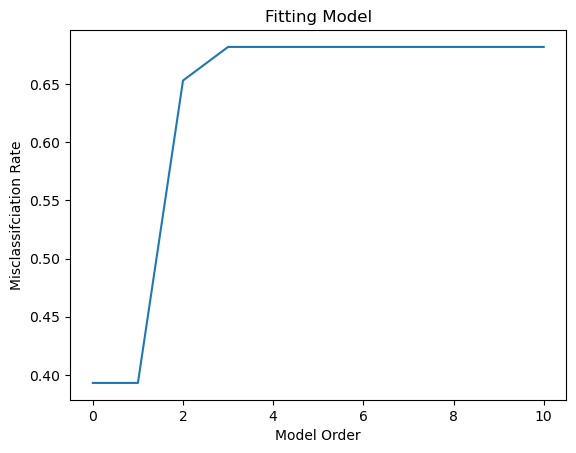

In [2177]:
w_race, mis_race = fit_polynomial(SRtrain, SRtest, new_ytrain, new_ytest)
PyPlot.plot(mis_race)
xlabel("Model Order"); ylabel("Misclassifciation Rate"); title("Fitting Model")
order_race = (sortperm(mis_race).-1)[1:3] 

In [2179]:
#Format Subject Age to remove 0's
SAtrain = []
SAtest = []
new_ytrain = []
new_ytest = []

for i in 1:1028
    if isequal(Xtrain[:,4][i], 0) == false 
            SAtrain = vcat(SAtrain, Xtrain[:,4][i])
            new_ytrain = vcat(new_ytrain, ytrain[i])
    end
end
for i in 1:258
    if isequal(Xtest[:,4][i], 0) == false 
            SAtest = vcat(SAtest, Xtest[:,4][i])
            new_ytest = vcat(new_ytest, ytest[i])
    end
end
SAtrain = convert(Array{Float64},SAtrain)
SAtest = convert(Array{Float64},SAtest)
new_ytrain = convert(Array{Int64},new_ytrain)
new_ytest = convert(Array{Int64},new_ytest)

116-element Array{Int64,1}:
  1
 -1
 -1
  1
  1
 -1
  1
 -1
  1
  1
  1
 -1
 -1
  ⋮
 -1
 -1
  1
 -1
  1
  1
  1
  1
 -1
 -1
 -1
  1

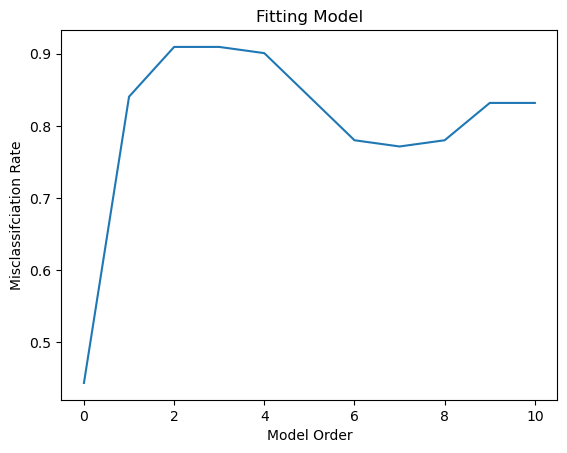

In [2180]:
w_age, mis_age = fit_polynomial(SAtrain, SAtest, new_ytrain, new_ytest)
PyPlot.plot(mis_age)
xlabel("Model Order"); ylabel("Misclassifciation Rate"); title("Fitting Model")
order_age = (sortperm(mis_age).-1)[1:3] 

In [1916]:
# description of the dataset
for i in 1:size(df_nomissing,2)
    println(string(names(df_nomissing)[i], "\t\t", typeof(df_nomissing[4,i]), "\t\t\t", df_nomissing[4,i]))  
end

Fatal		Int64			-1
SubjectArmed		Int64			1
SubjectRace		Int64			0
SubjectGender		Int64			0
SubjectAge		Int64			0
NumberOfShots		Int64			4
Year		Int64			2013


In [2183]:
#Format Number of Shots to remove 0's
NoStrain = []
NoStest = []
new_ytrain = []
new_ytest = []

for i in 1:1028
    if isequal(Xtrain[:,5][i], 0) == false | isequal(ytrain[i], 2) == false
            NoStrain = vcat(NoStrain, Xtrain[:,5][i])
            new_ytrain = vcat(new_ytrain, ytrain[i])
    end
end
for i in 1:258
    if isequal(Xtest[:,5][i], 0) == false | isequal(ytest[i], 2) == false
            NoStest = vcat(NoStest, Xtest[:,5][i])
            new_ytest = vcat(new_ytest, ytest[i])
    end
end
NoStrain = convert(Array{Float64},NoStrain)
NoStest = convert(Array{Float64},NoStest)
new_ytrain = convert(Array{Int64},new_ytrain)
new_ytest = convert(Array{Int64},new_ytest)

71-element Array{Int64,1}:
  1
  1
 -1
 -1
 -1
 -1
  0
 -1
 -1
 -1
  1
  1
 -1
  ⋮
  1
  1
 -1
  1
  1
 -1
  1
 -1
  1
 -1
 -1
 -1

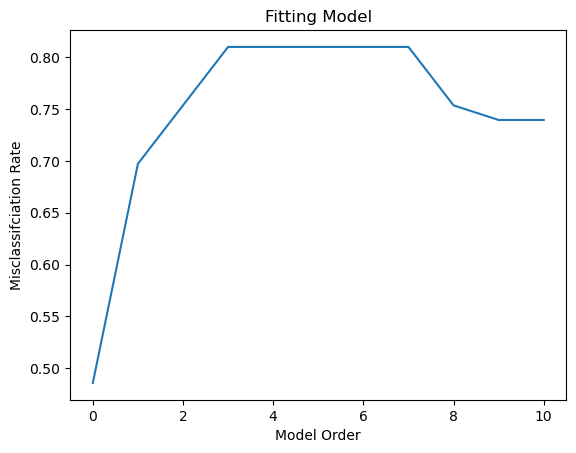

3-element Array{Int64,1}:
 0
 1
 9

In [2185]:
w_num_of_shots, mis_num_of_shots = fit_polynomial(NoStrain, NoStest, new_ytrain, new_ytest)
PyPlot.plot(mis_num_of_shots)
xlabel("Model Order"); ylabel("Misclassifciation Rate"); title("Fitting Model")
order_num_of_shots = (sortperm(mis_num_of_shots).-1)[1:3] 

## 3. Loss Functions:

In [1958]:
# description of the dataset
for i in 1:size(df_nomissing,2)
    println(string(names(df_nomissing)[i], "\t\t", typeof(df_nomissing[4,i]), "\t\t\t", df_nomissing[4,i]))  
end

Fatal		Int64			-1
SubjectArmed		Int64			1
SubjectRace		Int64			0
SubjectGender		Int64			0
SubjectAge		Int64			0
NumberOfShots		Int64			4
Year		Int64			2013


In [2186]:
# least squares
w_lsq = Xtrain \ ytrain

6-element Array{Float64,1}:
 -0.029884476140683923
 -0.004733111113747977
  0.26888129999898347
  0.009414965247484709
  0.022586825002220586
 -0.00029871785377489317

In [1921]:
using Plots, Random, LinearAlgebra, Statistics, SparseArrays
include("proxgrad.jl")

proxgrad_const

In [2187]:
# Quad loss and no reg
ch_hinge_quad = ConvergenceHistory("Least Squares")
w_lsq_pg = proxgrad(1/n_train*QuadLoss(), ZeroReg(), Xtrain, ytrain; stepsize = 2, maxiters = 10000, ch = ch_hinge_quad)

6-element Array{Float64,1}:
 -9.76162918775052e-6
  0.00020139049454117192
  0.0003200176025570748
  0.010456713304429998
  0.0022573739740563118
 -0.00019099834931080508

In [2194]:
#Quad Loss and L1 Reg
ch_hinge_quad = ConvergenceHistory("Least Squares")
w_lsq_l1 = proxgrad(1/n_train*QuadLoss(), OneReg(), Xtrain, ytrain; stepsize = 2, maxiters = 10000, ch = ch_hinge_quad)

6-element Array{Float64,1}:
  0.0
  0.0
  0.0
  0.009291823775475442
  3.260165247236822e-5
 -0.00017986525285791654

In [2196]:
#Quad Loss and Quad Reg
ch_hinge_quad = ConvergenceHistory("Least Squares")
w_lsq_quad = proxgrad(1/n_train*QuadLoss(), QuadReg(), Xtrain, ytrain; stepsize = 2, maxiters = 10000, ch = ch_hinge_quad)

6-element Array{Float64,1}:
 -9.745295446472795e-6
  0.00020100214130401706
  0.0003193255992930909
  0.01043813143190654
  0.0022523316015912688
 -0.00019085205103105084

In [2188]:
# logistic loss and no reg
ch_log = ConvergenceHistory("Logistic")
w_log = proxgrad(1/n_train*LogisticLoss(), ZeroReg(), Xtrain, ytrain; stepsize = 2, maxiters = 10000, ch = ch_log)

6-element Array{Float64,1}:
  1.2084440880854036e-5
  0.00042923535293469523
  0.000698762220111689
  0.021939978738117934
  0.0046127902428361855
 -0.00041750888867491575

In [2189]:
# hinge loss and no reg
ch_hinge = ConvergenceHistory("Hinge")
w_hinge = proxgrad(1/n_train*HingeLoss(), ZeroReg(), Xtrain, ytrain; stepsize = 2, maxiters = 10000, ch = ch_hinge)

6-element Array{Float64,1}:
 -9.645507689059061e-8
 -1.8839260512512337e-7
  6.51178388686092e-8
  9.184807415775419e-6
  1.1909133410405357e-6
 -0.0004966472328099646

In [2190]:
# logistic loss with l1 reg
ch_log_l1 = ConvergenceHistory("Logistic_l1")
w_log_l1 = proxgrad(1/n_train*LogisticLoss(), OneReg(), Xtrain, ytrain; stepsize = 2, maxiters = 10000, ch = ch_log_l1)

6-element Array{Float64,1}:
  0.0
  0.0
  0.0
  0.008187752685879634
  0.0
 -0.00030085901466044544

In [2191]:
# hinge loss with l1 reg
ch_hinge_l1 = ConvergenceHistory("Hinge_l1")
w_hinge_l1 = proxgrad(1/n_train*HingeLoss(), OneReg(), Xtrain, ytrain; stepsize = 2, maxiters = 10000, ch = ch_hinge_l1)

6-element Array{Float64,1}:
  0.0
  0.0
  0.0
  6.138172098262659e-7
  0.0
 -0.000496532532887449

In [2192]:
# logistic and quad reg
ch_log_quad = ConvergenceHistory("Log_quad")
w_log_quad = proxgrad(1/n_train*LogisticLoss(), QuadReg(), Xtrain, ytrain; stepsize = 2, maxiters = 10000, ch = ch_log_quad)

6-element Array{Float64,1}:
  1.1751542378053373e-5
  0.00042250581613998057
  0.0006866672075311394
  0.02162391496419621
  0.004530940436912205
 -0.0004148303786410227

In [2193]:
# hinge loss and quad reg
ch_hinge_quad = ConvergenceHistory("Hinge_quad")
w_hinge_quad = proxgrad(1/n_train*HingeLoss(), QuadReg(), Xtrain, ytrain; stepsize = 1, maxiters = 10000, ch = ch_hinge_quad)

6-element Array{Float64,1}:
 -9.645809283685894e-8
 -1.8839542208010429e-7
  6.511628762094e-8
  9.184729703256182e-6
  1.1909079532934557e-6
 -0.0004966475042442648

In [1940]:
# description of the dataset
for i in 1:size(df_nomissing,2)
    println(string(names(df_nomissing)[i], "\t\t", typeof(df_nomissing[4,i]), "\t\t\t", df_nomissing[4,i]))  
end

Fatal		Int64			-1
SubjectArmed		Int64			1
SubjectRace		Int64			0
SubjectGender		Int64			0
SubjectAge		Int64			0
NumberOfShots		Int64			4
Year		Int64			2013


### Misclassification rate

In [1931]:
# calculates the misclassification rate of a model
function misclassification(X, y, w)
    n = size(X,1)
    mis = 0
    for i in 1:n
        if(sign((w'*X[i,:])[1]) != y[i])
            mis += 1/n
        end
    end
    return round(mis, digits=4)
    #println("$(round(mis,4)*100) percent")
end

misclassification (generic function with 1 method)

In [1932]:
misclassification(Xtest, ytest, w_lsq) ## least squares

0.3566

In [1933]:
misclassification(Xtest, ytest, w_lsq_pg) ## Quad Loss (least squares)

0.3566

In [1956]:
misclassification(Xtest, ytest, w_lsq_l1) ## Quad loss, l1 reg.

0.3411

In [1957]:
misclassification(Xtest, ytest, w_lsq_quad) ## Quad loss, Quad reg.

0.3566

In [1934]:
misclassification(Xtest, ytest, w_log) ## logistic loss, no reg.

0.3527

In [1936]:
misclassification(Xtest, ytest, w_log_l1) ## logistic loss, l1 reg.

0.3527

In [1935]:
misclassification(Xtest, ytest, w_log_quad) ## logistic loss, quad reg.

0.3372

In [1937]:
misclassification(Xtest, ytest, w_hinge) ## hinge loss, no regularizer

0.3643

In [1938]:
misclassification(Xtest, ytest, w_hinge_quad) ## hinge loss, quad reg.

0.3643

In [1939]:
misclassification(Xtest, ytest, w_hinge_l1) ## hinge loss, l1 reg.

0.3643